In [21]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(RColorBrewer)
sd <- read.csv("/Users/gracepanos/Desktop/Speed_Dating/Speed Dating Data.csv")


In [7]:
#Here's how many matches attractive people get

Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 7”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message:
“Removed 9 rows containing missing values (geom_point).”

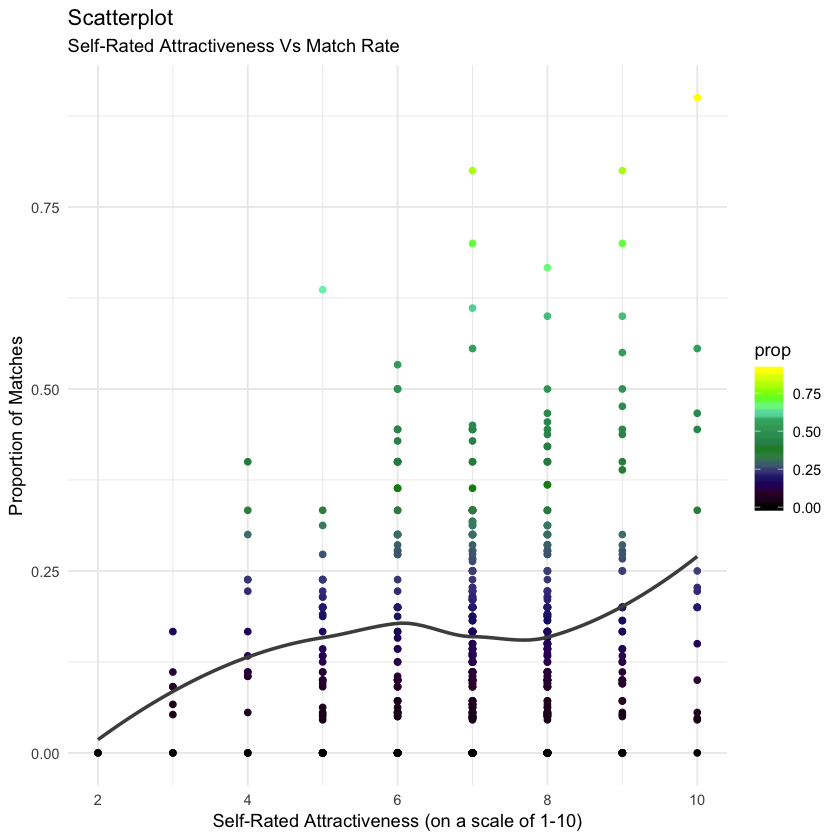

In [22]:
s <- sd[, c("iid","round","match", "attr3_1")]
xy <- aggregate(s$match, by=list(iid=s$iid), FUN=sum)
z <- s %>% distinct(iid, .keep_all = TRUE)
xyz <- cbind(z,xy)
ah <- xyz[, c("iid","round","attr3_1", "x")]
ah$prop <- xyz$x/xyz$round
gg11 <- ggplot(ah, aes(x=attr3_1, y=prop)) + 
  geom_point(aes(col=prop)) + 
  scale_color_gradientn(colors = c("black","#330033","#330066" ,
                                   "midnightblue","slateblue4", 
                                   "aquamarine4","green4","seagreen",
                                   "mediumseagreen","aquamarine2",
                                   "#66FF00","yellow"), 
                        values = c(0,.1,.15,.2,.25,.35,.4,.45,.65,.7,.8,1)) +
  geom_smooth(method="loess", color="gray30", se=FALSE) + 
  labs(subtitle="Self-Rated Attractiveness Vs Match Rate", 
       y="Proportion of Matches", 
       x="Self-Rated Attractiveness (on a scale of 1-10)", 
       title="Scatterplot") +
  theme_minimal()
gg11

In [23]:
### Participants were asked to rate their own attractiveness on a scale of 1 to 10 (1 being very unattractive, 10 being very attractive). They also reported the amount of matches they got at the end of the night. This dot plot displays how many matches people participants of different levels of attractiveness received. The trend line represents the average amount of matches for people of each level of attractiveness. On average, who rated themselves as more attractive receive more matches than people who rate themselves as less attractive. Most participants rated themselves at a 7 or an 8, so there is less data for people that rated themselves below a 6. This may explain the trend of less attractive people receiving a lower match rate.

In [ ]:
#MATCH: Can people accurately predict their own perceived value in the dating market?

In [24]:
a <- sd[, c("iid","round","match", "match_es","gender")]
b <- aggregate(a$match, by=list(iid=a$iid), FUN=sum)
c <- a %>% distinct(iid, .keep_all = TRUE)
d <- cbind(c,b)
oh <- d[, c("iid","round","match_es", "x","gender")]
oh$prop <- oh$x/oh$round

[1] -0.05327114

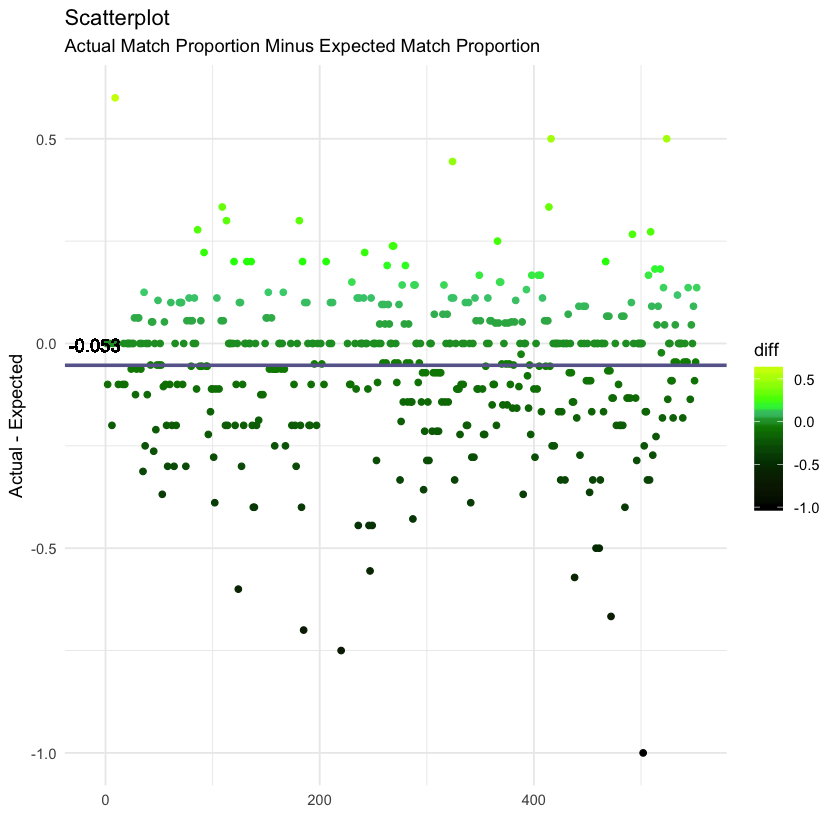

In [25]:
oh$expected_match_prop <- oh$match_es/oh$round
oh$diff <- oh$prop-oh$expected_match_prop
oh <- na.omit(oh)
mean(oh$diff)
library(ggplot2)
ggplot(oh) +
  geom_point(aes(iid,diff,color=diff))+
  geom_hline(yintercept=-0.05327114, color="#666699",size=1) +
  labs(subtitle="Actual Match Proportion Minus Expected Match Proportion", 
       y="Actual - Expected", 
       x="", 
       title="Scatterplot") +
  scale_color_gradientn(colors = c("black","#003300",
  "green4","seagreen3","#00FF00","#CCFF00"), 
  values = c(0,.3,.6,.7,.75,1))+
  geom_text(aes(-10,-.052,label = -0.053, vjust = -1)) +
  theme_minimal()

In [ ]:
### This visual represents the difference in how many matches a person expects to get in a night vs. how many matches a person actually ends up with. If Expected - Actual=0, the participant correctly predicted exactly how many matches they would receive. A positive value means that the participant got less matches than they expected, and a negative value means that the participant got more matches than they expected. The average difference is .05327, meaning in general participants would get slightly less matches than they expected.